In [1]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=54e75925d31011a3d86ef8b11c42fefe64d86e3dfbe177b37a48d3da93c72c09
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from pathlib import Path
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import pandas as pd
import scipy.stats as sstats
import pingouin
%matplotlib inline

In [4]:
plt.rcParams['font.size'] = 7
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
# this is for Zhen-Qi, change it when you run it
data_dir = Path("/content/gdrive/MyDrive/My Documents/Research/Manuscript_JAMAPsychiatry_EP_MEND_PLS/Data")
figs_dir = Path("/content/gdrive/MyDrive/My Documents/Research/Manuscript_JAMAPsychiatry_EP_MEND_PLS/Figures")

In [5]:
# this is for Haley
data_dir = Path("/content/gdrive/MyDrive/Manuscript_JAMAPsychiatry_EP_MEND_PLS/Data")
figs_dir = Path("/content/gdrive/MyDrive/Manuscript_JAMAPsychiatry_EP_MEND_PLS/Figures")

In [6]:
 classified_tracts = pd.read_csv(data_dir / "classified_tracts_w_coefs.csv")

In [7]:
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

In [14]:
classified_tracts.sort_values(by='MEND_coefs', key=abs, ascending=False)

,Tracts,Groups,Metrics,EP_coefs,MEND_coefs,EP_error,MEND_error,EP_CI,MEND_CI
9,Medial_lemniscus_L,Tracts in the brainstem,FA,-0.170608,-0.500342,0.186114,0.179425,-0.015507,0.320917
153,Medial_lemniscus_L,Tracts in the brainstem,RD,0.169968,0.477923,0.169612,0.182541,0.000356,0.295382
50,Genu_of_corpus_callosum,Commissural tracts,MD,0.321154,0.421295,0.183080,0.194404,0.138075,0.226892
146,Genu_of_corpus_callosum,Commissural tracts,RD,0.163471,0.384560,0.151884,0.177708,0.011587,0.206852
57,Medial_lemniscus_L,Tracts in the brainstem,MD,0.150828,0.382190,0.155824,0.208034,-0.004995,0.174156
...,...,...,...,...,...,...,...,...,...
115,Posterior_limb_of_internal_capsule_L,Projection tracts,AD,0.202510,0.007826,0.166564,0.251314,0.035945,-0.243488
109,Superior_cerebellar_peduncle_L,Tracts in the brainstem,AD,-0.058076,-0.005046,0.178347,0.261120,-0.120271,-0.256073
189,Uncinate_fasciculus_L,Association tracts,RD,0.155599,-0.003953,0.141855,0.237080,0.013744,-0.233127
111,Cerebral_peduncle_L,Projection tracts,AD,0.005131,0.001909,0.189489,0.256265,-0.184358,-0.254356


In [9]:
classified_tracts[classified_tracts["Tracts"].str.contains("lemn")]

,Tracts,Groups,Metrics,EP_coefs,MEND_coefs,EP_error,MEND_error,EP_CI,MEND_CI
8,Medial_lemniscus_R,Tracts in the brainstem,FA,-0.201056,-0.237031,0.201040,0.207494,0.000016,0.029537
9,Medial_lemniscus_L,Tracts in the brainstem,FA,-0.170608,-0.500342,0.186114,0.179425,-0.015507,0.320917
56,Medial_lemniscus_R,Tracts in the brainstem,MD,0.196317,0.249360,0.141101,0.214701,0.055217,0.034659
57,Medial_lemniscus_L,Tracts in the brainstem,MD,0.150828,0.382190,0.155824,0.208034,-0.004995,0.174156
104,Medial_lemniscus_R,Tracts in the brainstem,AD,-0.028724,0.122364,0.186443,0.222039,-0.157719,-0.099675
105,Medial_lemniscus_L,Tracts in the brainstem,AD,-0.033102,0.168386,0.173903,0.235239,-0.140801,-0.066853
152,Medial_lemniscus_R,Tracts in the brainstem,RD,0.221963,0.308549,0.175823,0.210240,0.046141,0.098308
153,Medial_lemniscus_L,Tracts in the brainstem,RD,0.169968,0.477923,0.169612,0.182541,0.000356,0.295382


In [ ]:
from matplotlib.colors import ListedColormap, to_rgb, to_hex
tract_type2color = {
    "Tracts in the brainstem": "#471C6C",
    "Commissural tracts": "#367D8F",
    "Association tracts": "#96D98C",
    "Projection tracts": "#F1E400",
}
tract_names = list(tract_type2color.keys())
tract_colors = list(tract_type2color.values())
cmap_tracts = ListedColormap([to_rgb(_) for _ in tract_colors])

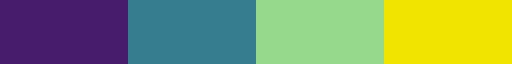

In [ ]:
cmap_tracts

In [ ]:
diff_pred_names = np.loadtxt(data_dir / "JHU_labels.txt", delimiter="\t", dtype=str)
# diff_pred_colors = [xload_names.index(_.split("_")[0]) for _ in diff_pred_names]

diff_tract_colors = [tract_names.index(classified_tracts.loc[i, "Groups"]) for i, _ in enumerate(diff_pred_names)]

In [ ]:
classified_tracts["combined_ci"] = (classified_tracts["EP_CI"] > 0).astype(int) + (classified_tracts["MEND_CI"] > 0).astype(int)

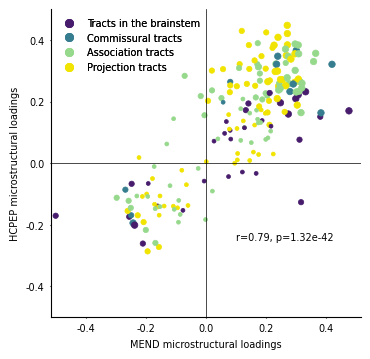

In [ ]:
score_corr_r, score_corr_p = sstats.pearsonr(classified_tracts['MEND_coefs'], classified_tracts['EP_coefs'])


fig, ax = plt.subplots(figsize=(4, 4))
scatter = ax.scatter(classified_tracts['MEND_coefs'], classified_tracts['EP_coefs'],
           c=diff_tract_colors, s=8 + classified_tracts["combined_ci"] * 7, cmap=cmap_tracts, linewidths=0.5, clip_on=False)# , edgecolors='white')

# for i in range(len(classified_tracts)):
#     ax.text(classified_tracts.loc[i, 'MEND_coefs'], classified_tracts.loc[i, 'EP_coefs'],
#             "".join(classified_tracts.loc[i, "combined_ci"]*["*"]),
#             fontsize=5, ha="center", va="center")

ax.axvline(x=0, c="k", linewidth=0.5)#, zorder=0.5, ls=(0, (2, 1)))
ax.axhline(y=0, c="k", linewidth=0.5)#, zorder=0.7, ls=(0, (2, 1)))

# ax.fill_between([0, 0.45], [0.4, 0.4], [0, 0], color=to_hex(scale_lightness(to_rgb(xload_colors[1]), 0.7)), zorder=0.5, alpha=0.3)
# ax.fill_between([-0.4, 0], [0, 0], [-0.4, -0.4], color=to_hex(scale_lightness(to_rgb(xload_colors[0]), 0.7)), zorder=0.5, alpha=0.3)

# reg_x = np.arange(-20, np.max(ep_pls_result["results"]["x_scores"][:, 0]), 0.1)
#ax.plot(reg_x, m * reg_x + b, color="gray", zorder=0.5)

ax.set(xlim=(-0.517, 0.517), ylim=(-0.5, 0.5), xticks=[-0.4, -0.2, 0, 0.2, 0.4], yticks=[-0.4, -0.2, 0, 0.2, 0.4],
       xlabel="MEND microstructural loadings", ylabel="HCPEP microstructural loadings")

ax.text(0.1, -0.25, f"r={score_corr_r:.2f}, p={score_corr_p:.2e}")

sns.despine(top=True, right=True, trim=False, ax=ax)
ax.tick_params(axis=u'both', which=u'both', length=1)

handles, previous_labels = scatter.legend_elements()
legend = ax.legend(handles=handles, labels=tract_names, loc="upper left", bbox_to_anchor=(0, 1.0), frameon=False)
ax.add_artist(legend)

fig.savefig(figs_dir / "mend_hcpep_xload_corr_by_tracts.svg")

<Axes: xlabel='MEND_coefs', ylabel='Density'>

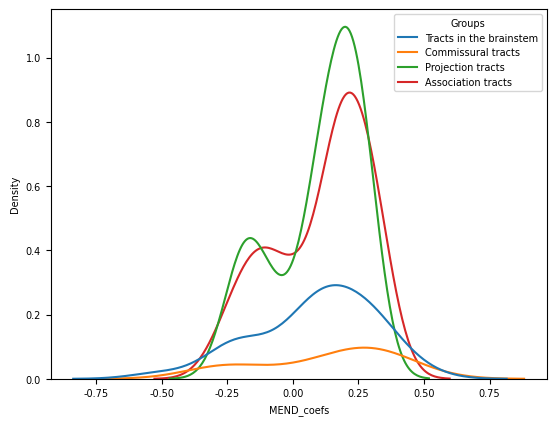

In [ ]:
sns.kdeplot(data=classified_tracts, x="MEND_coefs", hue="Groups")

<Axes: xlabel='EP_coefs', ylabel='Density'>

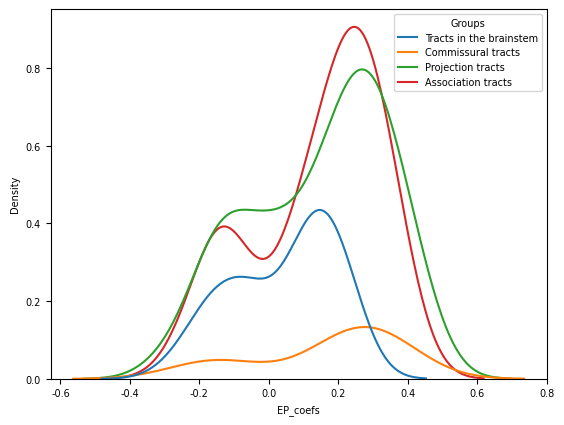

In [ ]:
sns.kdeplot(data=classified_tracts, x="EP_coefs", hue="Groups")

<Axes: xlabel='MEND_coefs', ylabel='Proportion'>

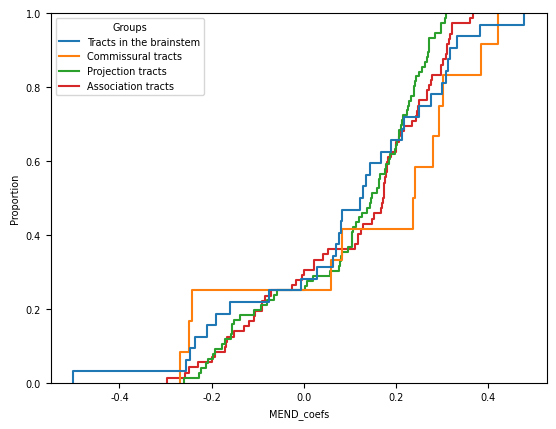

In [ ]:
sns.ecdfplot(data=classified_tracts, x="MEND_coefs", hue="Groups")

<Axes: xlabel='EP_coefs', ylabel='Proportion'>

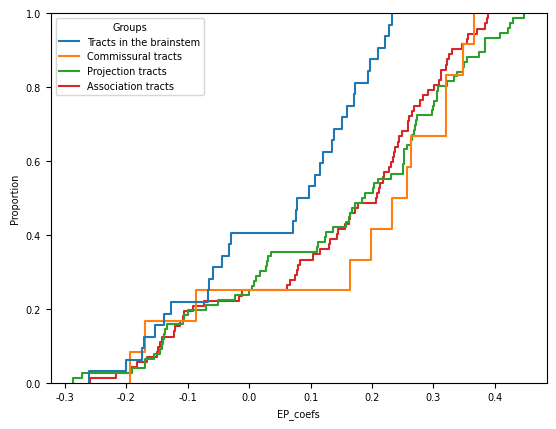

In [ ]:
sns.ecdfplot(data=classified_tracts, x="EP_coefs", hue="Groups")

<Axes: xlabel='MEND_coefs', ylabel='Count'>

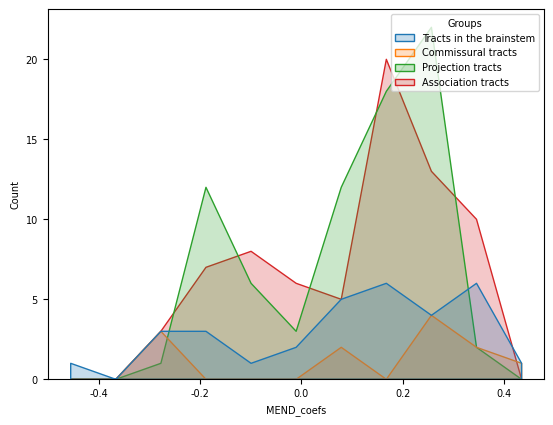

In [ ]:
sns.histplot(data=classified_tracts, x="MEND_coefs", hue="Groups", element="poly")

<Axes: xlabel='EP_coefs', ylabel='Count'>

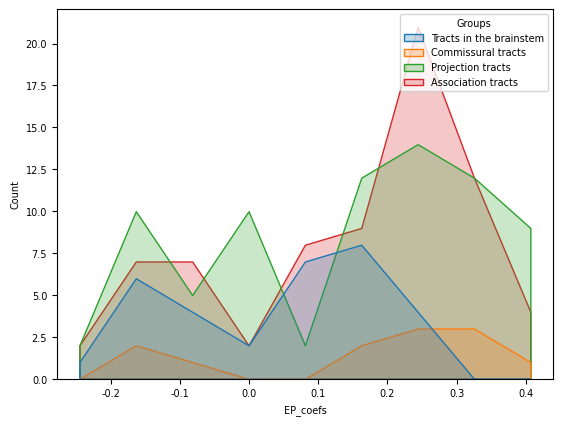

In [ ]:
sns.histplot(data=classified_tracts, x="EP_coefs", hue="Groups", element="poly")

<Axes: xlabel='MEND_coefs', ylabel='EP_coefs'>

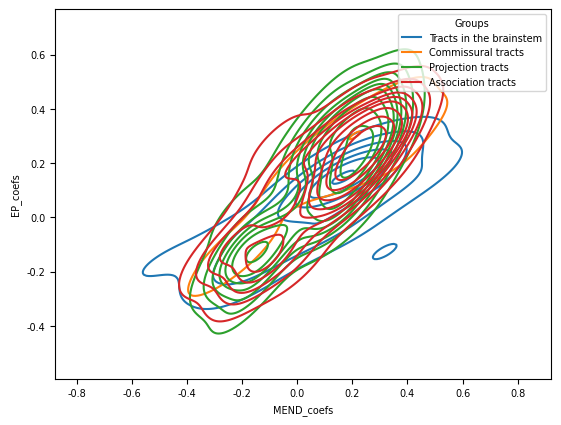

In [ ]:
sns.kdeplot(data=classified_tracts, x="MEND_coefs", y="EP_coefs", hue="Groups")

<Axes: xlabel='MEND_coefs', ylabel='EP_coefs'>

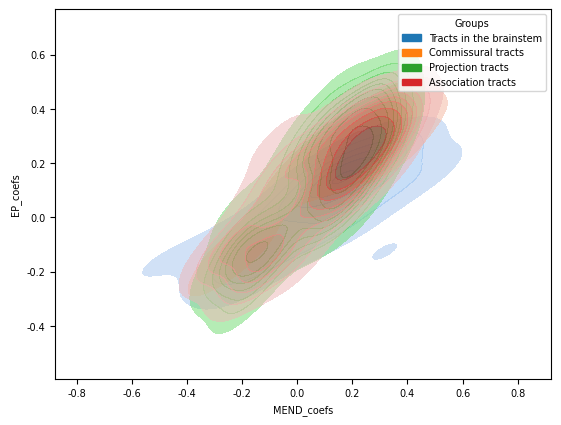

In [ ]:
sns.kdeplot(data=classified_tracts, x="MEND_coefs", y="EP_coefs", hue="Groups", fill=True, alpha=0.5)